# Fraud Detection

- Standard Modules Importations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

import warnings

warnings. simplefilter(action = "ignore", category = Warning)

In [3]:
data = pd.read_csv("fraud.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- We shall explore the data to see if we have some cleaning to do.

In [5]:
## We shall check for the number of features and observations we have in our datasets.
data.shape

(284807, 31)

- We have $ 284, 807 $ observations against $30$ features.

We will visualize the data distribution from the Class varibale

<AxesSubplot:xlabel='Class', ylabel='count'>

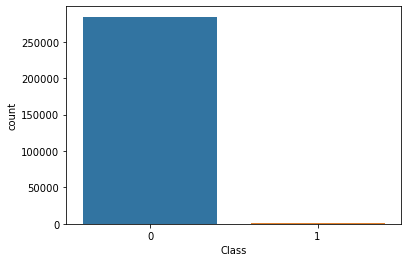

In [6]:
## We want to see if we have a fair distribution of our dataset for a model to learn from.

import seaborn as sns

sns.countplot(data['Class'])

- It is clearly seen by the count plot that the data distribution for the Class is higher in class 1 than class 0. 

<AxesSubplot:xlabel='Class', ylabel='Density'>

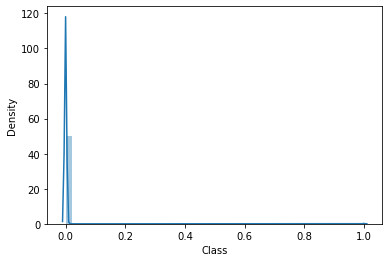

In [7]:
sns.distplot(data['Class'])

- Using the distribution plot we can see that almost all our data is highly densed on one class where the other class is approximately zero. 

In [8]:
from scipy.stats import norm, skew
print("Skewness: %f" % data['Class'].skew())
print("Kurtosis: %f" % data['Class'].kurt())

Skewness: 23.997579
Kurtosis: 573.887843


Skewness is a measure of the symmetry in a distribution.  A symmetrical dataset will have a skewness equal to 0.  So, a normal distribution will have a skewness of 0.   Skewness essentially measures the relative size of the two tails. Hence;

- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed and this is exactly our case. 

Similary;
Kurtosis is a measure of the combined sizes of the two tails.  It measures the amount of probability in the tails.  The value is often compared to the kurtosis of the normal distribution, which is equal to 3.  
- If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).  
- If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails). 
- Therefore we can conclude that the dataset has heavier tails than a normally distributed data and hence we will handle such cases strategically in curb the robustness in the model performance.

#### Let's do some descriptive analysis to check the means and standard deviation for each feature.

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Cleaning 

In [10]:
## checking for the types of inputs in our data
data.dtypes 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
# Let's check for nan values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Fortunately we have no 'Nan' values to deal with in our data.

- We also have no object types to handle. This sounds good so far.

In [12]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- The data is highly skewed towards the class "0" category. However, we shall check for accuracy level for the three models first and see if there is the need for improvement.

- We check for data summary on descriptive analysis.

- Quickly we shall use heatmap to check feature correlation in our data.

In [13]:
cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

- We split data into train and test for fitting and accuracy check

In [39]:
### creating a copy of the data
df = data.copy()

In [40]:
### Getting data ready for training and testing

X = df.drop(columns = ['Class', 'Time'])  ### extracting the features into 'X'
y = df[['Class']]   #### also extracting the response into the vector 'y'

In [41]:
### standard train and test importation from the sci-kit learn for data splitting.

from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(X,y, train_size = 0.7, random_state = 22)  ### maintaining train-size of 80% after splitting with 20% testing

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape  ### Checking the size of train and test splits.

((199364, 29), (85443, 29), (199364, 1), (85443, 1))

In [18]:
yf = pd.DataFrame(y_train)
yf['Class'].value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
def split(X,y):
    return train_test_split(X,y, test_size=0.7, random_state=58)

### RandomForestClassifier

In [20]:
### importing the classifier from the ensemble library within sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [21]:
### instantiating the models
class models:
    def __init__(self, fun):
        self.fun = fun
    
    def random_forest(fun):
        X_train, X_test, y_train, y_test = fun
        RFC = RandomForestClassifier(n_estimators = 100,random_state = 58)
        RFC.fit(X_train,y_train)
        Random_Forest_score = RFC.score(X_test,y_test)
        return Random_Forest_score,RFC

    def support_vector_machine(fun):
        X_train, X_test, y_train, y_test = fun
        svm_clf = SVC(random_state = 58)
        svm_clf.fit(X_train,y_train)
        svm_score = svm_clf.score(X_test,y_test)
        return svm_score, svm_clf


    def ann():
        model = keras.Sequential([
        keras.layers.Dense(units = 500, input_shape = (29,),kernel_initializer = 'he_uniform', activation = 'relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units = 200,kernel_initializer = 'he_uniform', activation = 'relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid')
            ])  #### ANN with two hidden layers.

        model.compile(optimizer = 'adam', 
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
        return model

In [22]:
### Getting score and model for SVM classifier for classification report
svm_score, svm = models.support_vector_machine(split(X,y))

In [ ]:
### SUPPORT VECTOR MACHINE

### Getting score and model for SVM classifier for classification report
svm_score, svm = models.support_vector_machine(split(X,y))


### We shall use the split function to make predictions and print classification report
### To check for the model precision, recall and f1-score
X_train, X_test, y_train,y_test = split(X,y)
svm_preds = svm.predict(X_test)
print(confusion_matrix(y_test,svm_preds))
print(classification_report(y_test, svm_preds))
print(svm_score)

In [23]:
### We shall use the split function to make predictions and print classification report
### To check for the model precision, recall and f1-score
X_train, X_test, y_train,y_test = split(X,y)
svm_preds = svm.predict(X_test)
print(confusion_matrix(y_test,svm_preds))
print(classification_report(y_test, svm_preds))
print(svm_score)

[[198997     20]
 [   249     99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199017
           1       0.83      0.28      0.42       348

    accuracy                           1.00    199365
   macro avg       0.92      0.64      0.71    199365
weighted avg       1.00      1.00      1.00    199365

0.9986507160233742


- Support Vector Machine irrespective of the high score has a very poor performance for recall and f1-score.

In [24]:
# cm_svm = confusion_matrix(y_test,svm_preds)
# # plt.figure(figsize = (6,4))
# # sns.heatmap(cm_svm,annot = True,
# #             linewidths = .5,
# #             center = 0,
# #             cbar = False, 
# #             cmap = None)
# # plt.xlabel("Predicted Class")
# # plt.ylabel("True Class")
# # plt.show()

In [25]:
##Getting score and model for classification report on the model performance
rfc_score, rfc = models.random_forest(split(X,y))

In [26]:
### We shall use the split function to make predictions and print classification report
### To check for the model precision, recall and f1-score

X_train, X_test, y_train,y_test = split(X,y)
rfc_preds = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_preds))
print(classification_report(y_test, rfc_preds))
print(rfc_score)

[[198991     26]
 [    85    263]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199017
           1       0.91      0.76      0.83       348

    accuracy                           1.00    199365
   macro avg       0.95      0.88      0.91    199365
weighted avg       1.00      1.00      1.00    199365

0.9994432322624333


- Random forest has good performance and recall and f1-score is better than Support Vector Machine. 

In [27]:
# cm_rfc = confusion_matrix(y_test,rfc_preds)
# # plt.figure(figsize = (6,4))
# # sns.heatmap(cm_rfc,annot = True,
# #             linewidths = .5,
# #             center = 0,
# #             cbar = False, 
# #             cmap = None)
# # plt.xlabel("Predicted Class")
# # plt.ylabel("True Class")
# # plt.show()

In [28]:
### instantiating the ann from the class models and fitting for prediction
ann = models.ann()
ann.fit(X_train,y_train, batch_size = 100, validation_data=(X_test,y_test),epochs = 5)

Epoch 1/5
855/855 [==============================] - 9s 10ms/step - loss: 0.3465 - accuracy: 0.9965 - val_loss: 0.1066 - val_accuracy: 0.9990
Epoch 2/5
855/855 [==============================] - 9s 10ms/step - loss: 0.0986 - accuracy: 0.9980 - val_loss: 0.0185 - val_accuracy: 0.9990
Epoch 3/5
855/855 [==============================] - 9s 10ms/step - loss: 0.0332 - accuracy: 0.9984 - val_loss: 0.0163 - val_accuracy: 0.9989
Epoch 4/5
855/855 [==============================] - 9s 10ms/step - loss: 0.0296 - accuracy: 0.9986 - val_loss: 0.0096 - val_accuracy: 0.9990
Epoch 5/5
855/855 [==============================] - 9s 10ms/step - loss: 0.0188 - accuracy: 0.9988 - val_loss: 0.0122 - val_accuracy: 0.9987


In [29]:
### We shall use the split function to make predictions and print classification report
### To check for the model precision, recall and f1-score

X_train, X_test, y_train,y_test = split(X,y)
ann.evaluate(X_test,y_test)
ann_preds = ann.predict(X_test)
ann_preds = [np.argmax(i) for i in ann_preds]
print(confusion_matrix(y_test,ann_preds))
print(classification_report(y_test, ann_preds))

6231/6231 [==============================] - 10s 2ms/step - loss: 0.0122 - accuracy: 0.9987
[[199017      0]
 [   348      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199017
           1       0.00      0.00      0.00       348

    accuracy                           1.00    199365
   macro avg       0.50      0.50      0.50    199365
weighted avg       1.00      1.00      1.00    199365



- Artificial Neural Network does not perform better for our data structure. The model is not able to learn for the fraud class. Although is has a high accuracy precision, recall and f1-score is extremely poor and hence not good.

In [30]:
# cm_ann = confusion_matrix(y_test,ann_preds)
# # plt.figure(figsize = (6,4))
# # sns.heatmap(n_cm,annot = True,
# #             linewidths = .5,
# #             center = 0,
# #             cbar = False, 
# #             cmap = None)
# # plt.xlabel("Predicted Class")
# # plt.ylabel("True Class")
# # plt.show()

- The confusion matrix shows that the predictions for the class 0 was not learned  by the neural network. We shall look for ways to improve this problem.

### Using stratifiedKFold sampling technique as a way of curbing the biasedness of the class distribution in our data.

In [31]:
## Converting the input and output dataframe into numpy arrays
X_new,y_new = X.values, y.values

In [32]:
 # Importing necessary libraries for the StratifiedKFold split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

SVM = SVC(random_state = 40)  ### instantiating the model with some necessary parameters
RFC = RandomForestClassifier(n_estimators = 120, random_state = 58) ### instantiating our random_forest
folds = StratifiedKFold(n_splits=5) ### instantiating the stratifiedkfold with 5 number of splits.

### a function that takes the model, fit the model for each split and then computer the score
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    return model.score(X_test, y_test)

### initiating an empty list to record the score for each split
scores_svm = []
scores_rf = []

#### looping through all the splitted data and appending the score for each split using the get_score function.
for train_index, test_index in folds.split(X,y): 
    X_train, X_test, y_train, y_test = X_new[train_index], X_new[test_index], y_new[train_index], y_new[test_index] 
    scores_svm.append(get_score(SVM, X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RFC, X_train, X_test, y_train, y_test))
    
### printing out the scores
print(scores_svm)
print(scores_rf)

[[56827    36]
 [   33    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.65      0.67      0.66        99

    accuracy                           1.00     56962
   macro avg       0.82      0.83      0.83     56962
weighted avg       1.00      1.00      1.00     56962

[[56824    39]
 [   12    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.69      0.88      0.77        99

    accuracy                           1.00     56962
   macro avg       0.85      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56861     2]
 [   52    47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.47      0.64        99

    accuracy                           1.00     56962
   macro avg       0.98      0.74  

In [79]:
### A function that returns our artificial neural network. This shall reduce the cost of having to build for different sampling techniques
def ANN():
    model = keras.Sequential([
    keras.layers.Dense(units = 500, input_shape = (29,),kernel_initializer = 'he_uniform', activation = 'relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 200,kernel_initializer = 'he_uniform', activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid')
        ])  #### ANN with two hidden layers.

    model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
    return model

In [ ]:
# Using stratifiedKFold with different epochs and batch_size

params = {'epochs':[50], 'batch_size':[100]}
Evaluation_score = [] # recording each evaluation in all the iterations

for epochs, batch_size in zip(params['epochs'], params['batch_size']):
    for train_index, test_index in folds.split(X_new,y_new):
        X_train, X_test, y_train, y_test = X_new[train_index], X_new[test_index], y_new[train_index], y_new[test_index]
        model=ANN()
        model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test, y_pred))
        Evaluation_score.append(model.evaluate(X_test,y_test))
print(Evaluation_score)

### Data statistics under the following "Imbalance learning" topics to conclude on the best model.

1) Under Sampling 

2) Over Sampling

# Under Sampling

In [76]:
##### Let define a function for the two classifiers, SVM and Random Forest

def rfc_sample(X_train_sample, y_train_sample,X_test,y_test):
    rfc_us = RandomForestClassifier(n_estimators = 100, random_state=100)
    rfc_us.fit(X_train_sample, y_train_sample)
    
    #### Now we use the model to make predictions on the entire data and then check for the precision, recall and fi-score
    us_preds = rfc_us.predict(X_test)
    print(confusion_matrix(y_test,us_preds))
    print(classification_report(y_test, us_preds))
    print(rfc_us.score(X_test,y_test))


def svm_sample(X_train_sample, y_train_sample,X_test,y_test):
    svm_all = SVC(random_state=60)
    svm.fit(X_train_sample, y_train_sample)
    #### Now we use the model to make predictions on the entire data and then check for the precision, recall and fi-score
    us_preds = rfc_us.predict(X_test)
    print(confusion_matrix(y_test,us_preds))
    print(classification_report(y_test, us_preds))
    print(rfc_us.score(X_test,y_test))

In [34]:
from imblearn.under_sampling import NearMiss

In [54]:
ns = NearMiss(1)

In [58]:
### resampling the train data
X_train_us, y_train_us = ns.fit_resample(X,y)

In [59]:
#### The composition of the data distribution before undersampling

print(y_train['Class'].value_counts())

0    199020
1       344
Name: Class, dtype: int64


In [60]:
### The composition of the data after the undersampling in the ratio 0.7
print(y_train_us['Class'].value_counts())

0    492
1    492
Name: Class, dtype: int64


### RandomForestClassifier for Undersampled Datasets

In [77]:
rfc_sample(X_train_us, y_train_us, X_test,y_test)

[[  549 84746]
 [    0   148]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01     85295
           1       0.00      1.00      0.00       148

    accuracy                           0.01     85443
   macro avg       0.50      0.50      0.01     85443
weighted avg       1.00      0.01      0.01     85443

0.008157485107030418


- Here after undersampling technique it is observed accuracy reduced which very obvious but most interestingly almost all the information were lost during the undersampling and hence leading to poor performance of the model for the class 0. 

### Support Vector Classifier for Undersampled data

In [78]:
svm_sample(X_train_us, y_train_us, X_test,y_test)

[[  549 84746]
 [    0   148]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01     85295
           1       0.00      1.00      0.00       148

    accuracy                           0.01     85443
   macro avg       0.50      0.50      0.01     85443
weighted avg       1.00      0.01      0.01     85443

0.008157485107030418


- Support Vector Machine also performed very bad for precisiona and f1-score. Hence our undersampling technique does not favor our objectives here.

### ANN for Undersampled Data

In [81]:
### Just call the ANN function
model=ANN()
model.fit(X_train_us,y_train_us, batch_size=10, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
99/99 [==============================] - 10s 101ms/step - loss: 0.5668 - accuracy: 0.9289 - val_loss: 166.1357 - val_accuracy: 0.0664
Epoch 2/10
99/99 [==============================] - 9s 94ms/step - loss: 0.0745 - accuracy: 0.9817 - val_loss: 167.8307 - val_accuracy: 0.0762
Epoch 3/10
99/99 [==============================] - 9s 95ms/step - loss: 0.0470 - accuracy: 0.9858 - val_loss: 196.7368 - val_accuracy: 0.0525
Epoch 4/10
99/99 [==============================] - 9s 94ms/step - loss: 0.0436 - accuracy: 0.9878 - val_loss: 205.2281 - val_accuracy: 0.0454
Epoch 5/10
99/99 [==============================] - 9s 94ms/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 200.5938 - val_accuracy: 0.0525
Epoch 6/10
99/99 [==============================] - 9s 94ms/step - loss: 0.0209 - accuracy: 0.9959 - val_loss: 207.4711 - val_accuracy: 0.0458
Epoch 7/10
99/99 [==============================] - 9s 94ms/step - loss: 0.0312 - accuracy: 0.9919 - val_loss: 216.9597 - val_accuracy: 0.03

In [96]:
#### We make predictions and check the metrics for the performance of the Artificial Neural Network.
model.evaluate(X_test,y_test)
ann_preds = model.predict(X_test)
ann_us_preds = [np.argmax(i) for i in ann_preds]
print(confusion_matrix(y_test,ann_us_preds))
print(classification_report(y_test, ann_us_preds))

2671/2671 [==============================] - 4s 1ms/step - loss: 228.6651 - accuracy: 0.0339
[[85295     0]
 [  148     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



- Obviously, ANN seem biased towards the majority class for the undersample technique

# Over Sampling

In [90]:
### Oversampling using RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

In [91]:
# Oversampling with a ratio of 0.9 of minority class to majority class
os = RandomOverSampler(sampling_strategy=0.9)

In [92]:
X_train_os, y_train_os = os.fit_resample(X,y)

In [97]:
print(y['Class'].value_counts())
print(y_train_os['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64
0    284315
1    255883
Name: Class, dtype: int64


#### Random Forest for Oversampled data

In [98]:
### We shall fit the new dataset and make predictions from the test split of our original data.
rfc_sample(X_train_os, y_train_os, X_test,y_test)

[[85295     0]
 [    0   148]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00       148

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443

1.0


- This sampling technique seem to have outperformed the undersampling in an excellent way. The model has had enough data to make decision. And since precision, recall and f1-score has a very good performance here we can say that this technique and perhaps the model is so far good.
- Best sampling technique for the particular dataset is evidenced by the results. 

#### Support Vector for Oversampled data

In [95]:
svm_sample(X_train_os, y_train_os, X_test,y_test)

[[  549 84746]
 [    0   148]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01     85295
           1       0.00      1.00      0.00       148

    accuracy                           0.01     85443
   macro avg       0.50      0.50      0.01     85443
weighted avg       1.00      0.01      0.01     85443

0.008157485107030418


# Ensembled Technique

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
easy = EasyEnsembleClassifier()

In [ ]:
easy.fit(X_train,Y_train)

In [ ]:
y_pred = easy.predict(X_test)

print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))